In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['AB_NYC_2019.csv']))
print(df.head(5))


Saving AB_NYC_2019.csv to AB_NYC_2019 (1).csv
     id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]


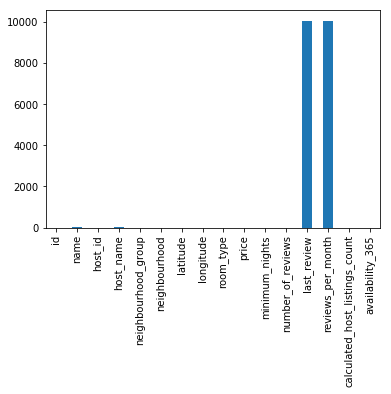

In [4]:
#What can we learn about hosts and area?

df.isna().sum().plot.bar()

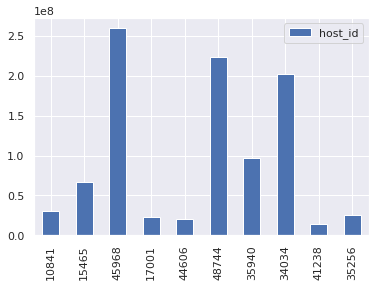

In [84]:
#a = pd.crosstab(df['host_id'],df['neighbourhood']).plot.bar()
#df['top_hosts'] = df['host_id'].value_counts().head(20)
#df.groupby(['neighbourhood_group']).agg({'host_id':'sum'}).plot.bar()

# df.groupby(['neighbourhood_group']).agg({'neighbourhood':'count'})
# plt.figure(figsize=(12,5))
# sns.barplot('neighbourhood_group','host_id',hue ='neighbourhood',data=df.sample(100))


##
#sns.set()

df[['neighbourhood_group','host_id','neighbourhood']].sample(10).plot(kind='bar', stacked=True)



In [72]:
plt.figure(figsize=(12,5))
sns.barplot('host_id','neighbourhood_group',data=df['host_id'].value_counts())


ValueError: ignored

<Figure size 864x360 with 0 Axes>

In [107]:
df = df.drop('last_review',axis=1)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [93]:
df['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

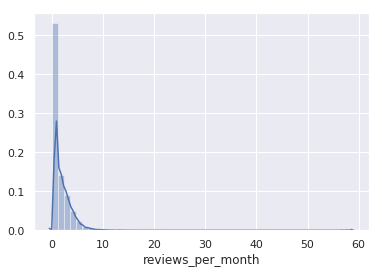

In [95]:
sns.distplot(df['reviews_per_month'].dropna())

In [104]:
df['reviews_per_month'].value_counts()

0.00     10052
0.02       919
0.05       893
1.00       893
0.03       804
0.16       667
0.04       655
0.08       596
0.09       593
0.06       579
0.11       539
0.07       466
0.13       463
0.10       457
0.12       413
2.00       406
0.14       399
0.15       374
0.19       357
0.21       343
0.17       321
0.22       318
0.18       305
0.26       305
0.25       290
0.23       289
0.32       280
0.27       277
0.20       276
0.24       266
         ...  
8.40         1
9.21         1
8.75         1
9.56         1
11.17        1
9.83         1
11.91        1
14.62        1
13.27        1
8.69         1
27.95        1
16.22        1
10.36        1
7.25         1
12.11        1
6.39         1
7.23         1
9.97         1
8.79         1
11.14        1
9.24         1
9.78         1
13.42        1
6.74         1
11.21        1
10.23        1
8.94         1
6.04         1
7.61         1
10.67        1
Name: reviews_per_month, Length: 938, dtype: int64

In [0]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

0.00     10052
0.02       919
0.05       893
1.00       893
0.03       804
0.16       667
0.04       655
0.08       596
0.09       593
0.06       579
0.11       539
0.07       466
0.13       463
0.10       457
0.12       413
2.00       406
0.14       399
0.15       374
0.19       357
0.21       343
0.17       321
0.22       318
0.18       305
0.26       305
0.25       290
0.23       289
0.32       280
0.27       277
0.20       276
0.24       266
         ...  
8.40         1
9.21         1
8.75         1
9.56         1
11.17        1
9.83         1
11.91        1
14.62        1
13.27        1
8.69         1
27.95        1
16.22        1
10.36        1
7.25         1
12.11        1
6.39         1
7.23         1
9.97         1
8.79         1
11.14        1
9.24         1
9.78         1
13.42        1
6.74         1
11.21        1
10.23        1
8.94         1
6.04         1
7.61         1
10.67        1
Name: reviews_per_month, Length: 938, dtype: int64

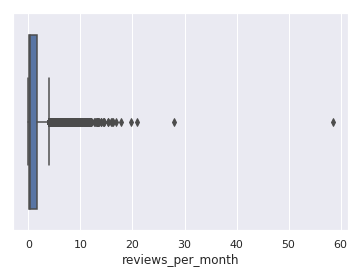

In [100]:
sns.boxplot(df['reviews_per_month'])

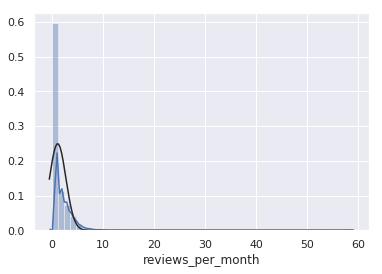

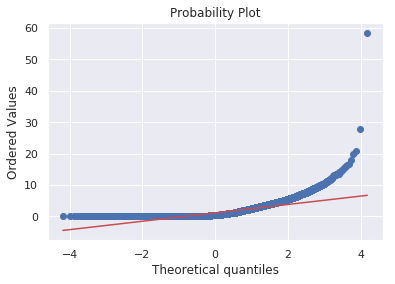

In [102]:
from scipy import stats
from scipy.stats import norm
# Deviation from Normality
norm.fit(df['reviews_per_month'])
sns.distplot(df['reviews_per_month'],fit=norm)
fig= plt.figure()
#QQ plot
stats.probplot(df['reviews_per_month'],plot=plt)
plt.show()